In [135]:
from __future__ import annotations
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import warnings
warnings.filterwarnings("ignore")
import hdf5plugin #in case needed for h5ad reading (if previously saved with compression)
import sys
import os

# input_path1 = str(sys.argv[1])
# input_path2 = str(sys.argv[2])

input_path1 = "/home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_filt.h5ad"



print("Reading " + input_path1 + "...")
etmr1 = ad.io.read_h5ad(input_path1)
print(etmr1)

print("Computing " + input_path1 + " PCA...")
sc.pp.pca(etmr1)


Reading /home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_filt.h5ad...
AnnData object with n_obs × n_vars = 49124 × 2688
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'Tumor_Type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'names', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    layers: 'counts'
Computing /home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_filt.h5ad PCA...


This is the snRNA-seq data of 9 patient tumors. The goal is to make a separate analisis from the ones I have where I integrated the data with the reference using scanpy ingest(). I'll run some clusterization only on the tumor samples and see if I need to do some integration like cca or something else to see how the DICER tumor behaves in comparison with the C19MC tumors. DICER is very interesting because the mutant mice in the lab have a DICER mutation. 

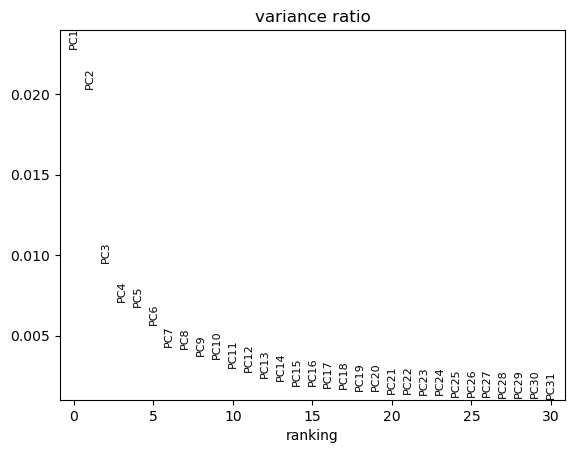

In [136]:
sc.pl.pca_variance_ratio(etmr1)

In [137]:
print("Computing" + input_path1 + " neighbors and UMAP...")
sc.pp.neighbors(etmr1, n_neighbors=11, n_pcs=20)
sc.tl.umap(etmr1)

print("Computing" + input_path1 + " Leiden clustering...")
sc.tl.leiden(etmr1, resolution=1)

Computing/home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_filt.h5ad neighbors and UMAP...
Computing/home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_filt.h5ad Leiden clustering...


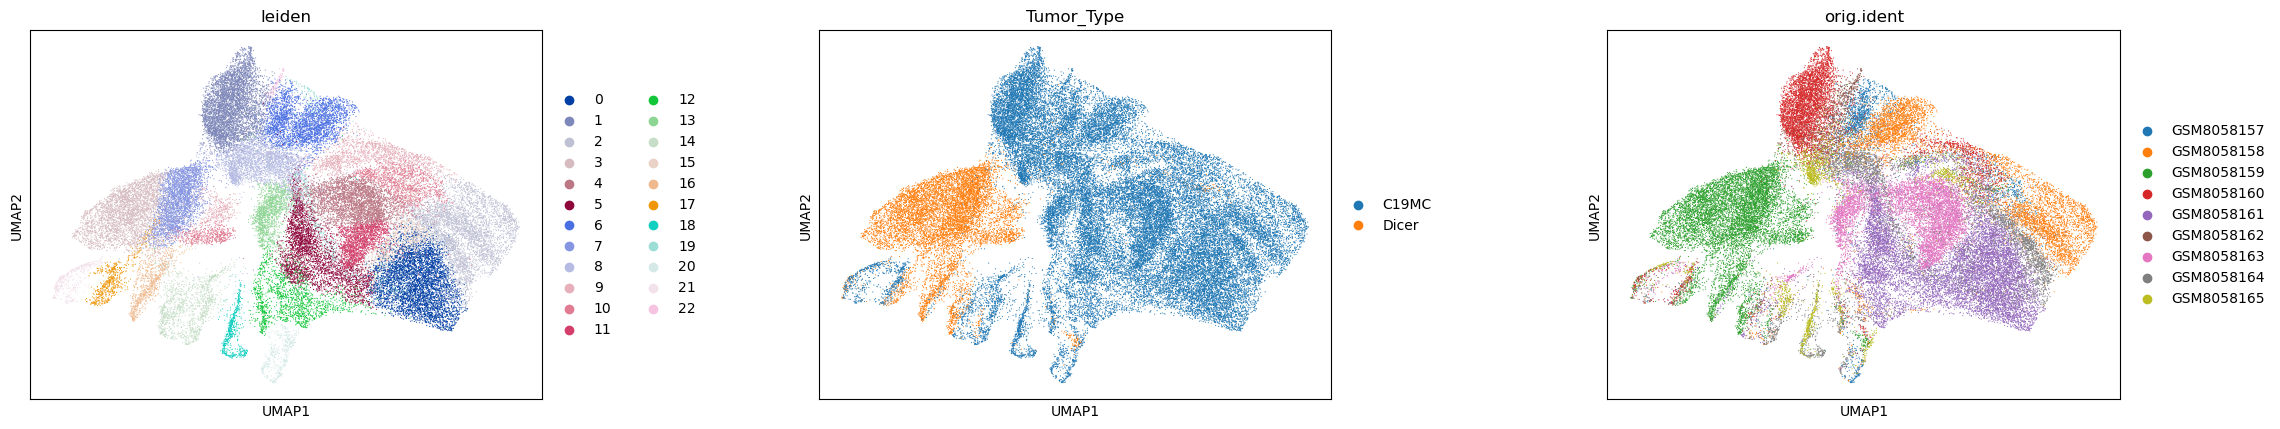

In [138]:
sc.pl.umap(etmr1, color=["leiden", "Tumor_Type", "orig.ident"], wspace=0.4)

In [139]:
etmr1.obs


,orig.ident,nCount_RNA,nFeature_RNA,Sample_ID,Tumor_Type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
GSM8058157_KK22-H-225_AAACAAGCATTCGGTTACTACTCA-1,GSM8058157,1721.0,1395,KK22-H-225,C19MC,1395,1721.0,15.0,0.871586,6
GSM8058157_KK22-H-225_AAACCAGGTTGCATCGACTACTCA-1,GSM8058157,2185.0,1646,KK22-H-225,C19MC,1646,2185.0,11.0,0.503432,6
GSM8058157_KK22-H-225_AAACGGGCAATAACCGACTACTCA-1,GSM8058157,1090.0,924,KK22-H-225,C19MC,924,1090.0,0.0,0.000000,10
GSM8058157_KK22-H-225_AAACTGGGTGCACAAAACTACTCA-1,GSM8058157,3515.0,2196,KK22-H-225,C19MC,2196,3515.0,1.0,0.028450,20
GSM8058157_KK22-H-225_AAAGATGCAATCGTGAACTACTCA-1,GSM8058157,835.0,746,KK22-H-225,C19MC,746,835.0,0.0,0.000000,10
...,...,...,...,...,...,...,...,...,...,...
GSM8058165_KK23-H-512_TTTGCCCGTGCCCGATATGTTGAC-1,GSM8058165,514.0,457,KK23-H-512,C19MC,457,514.0,13.0,2.529183,14
GSM8058165_KK23-H-512_TTTGCGCAGGGTGGGAATGTTGAC-1,GSM8058165,1822.0,1472,KK23-H-512,C19MC,1472,1822.0,5.0,0.274424,20
GSM8058165_KK23-H-512_TTTGCTGAGAGGTTTAATGTTGAC-1,GSM8058165,306.0,286,KK23-H-512,C19MC,286,306.0,2.0,0.653595,8
GSM8058165_KK23-H-512_TTTGCTGAGGGCACTAATGTTGAC-1,GSM8058165,335.0,295,KK23-H-512,C19MC,295,335.0,15.0,4.477612,18


In [140]:

sce.pp.harmony_integrate(etmr1, "Tumor_Type")

2025-11-12 17:38:35,490 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-12 17:38:52,940 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-12 17:38:53,240 - harmonypy - INFO - Iteration 1 of 10
2025-11-12 17:39:13,825 - harmonypy - INFO - Iteration 2 of 10
2025-11-12 17:39:34,490 - harmonypy - INFO - Converged after 2 iterations


In [141]:
etmr1.obsm['X_umap_unintegrated'] = etmr1.obsm['X_umap'].copy()
etmr1.obs['leiden_unintegrated'] = etmr1.obs['leiden'].copy()
sc.pp.neighbors(etmr1, use_rep='X_pca_harmony')
sc.tl.umap(etmr1, init_pos='X_pca_harmony')
sc.tl.leiden(etmr1, resolution=1)

In [142]:
print(etmr1)

AnnData object with n_obs × n_vars = 49124 × 2688
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'Tumor_Type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_unintegrated'
    var: 'names', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Tumor_Type_colors', 'orig.ident_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony', 'X_umap_unintegrated'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'


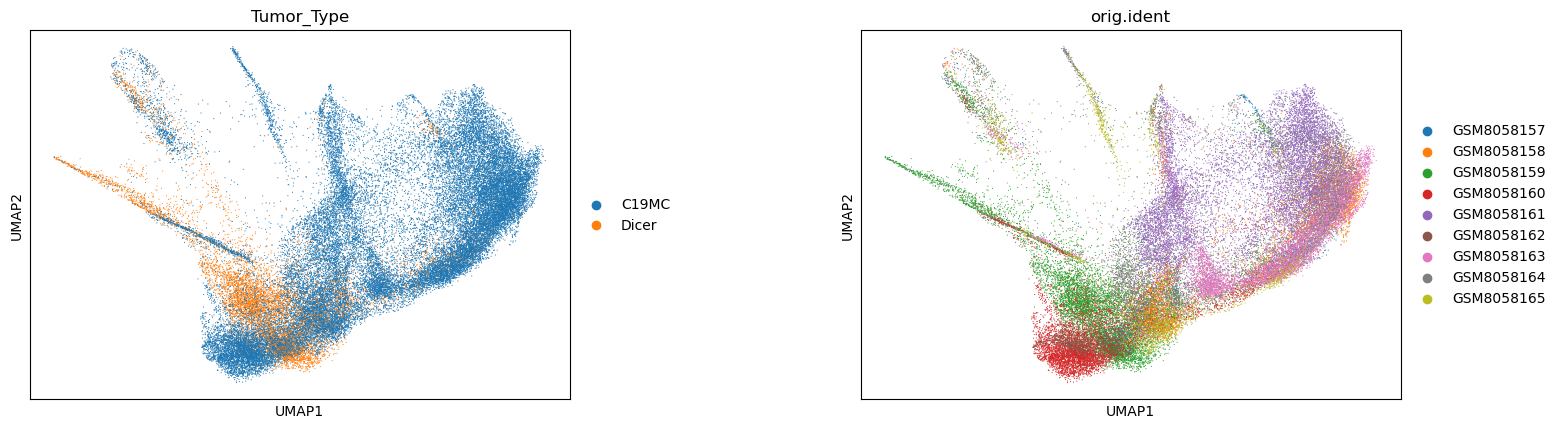

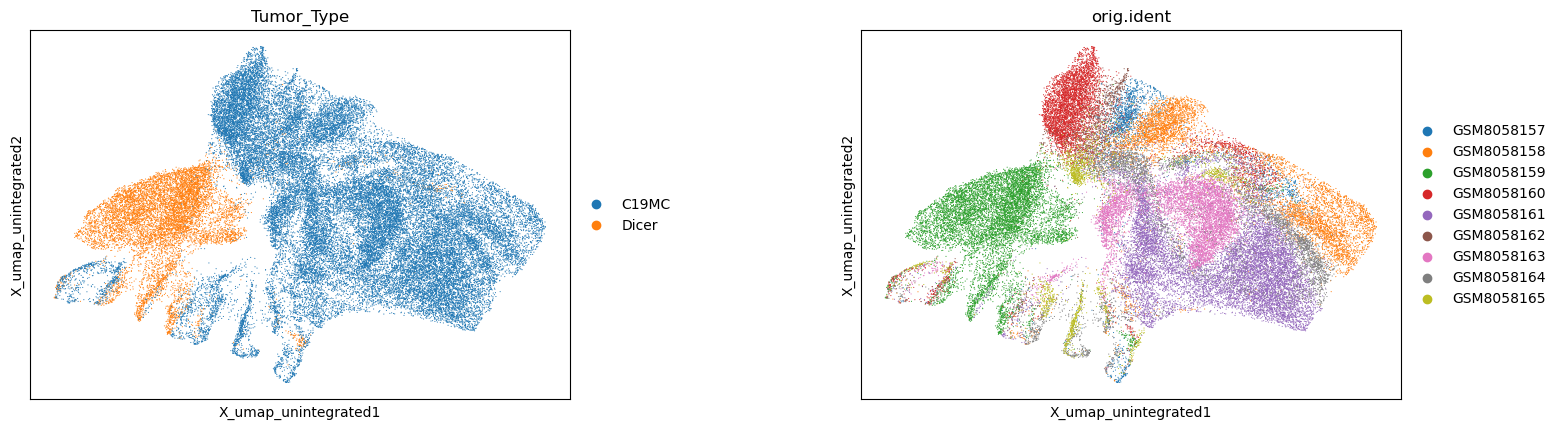

In [143]:
sc.pl.umap(etmr1, color=["Tumor_Type", "orig.ident"], wspace=0.4)
sc.pl.embedding(etmr1, basis="X_umap_unintegrated", color=["Tumor_Type", "orig.ident"], wspace=0.4)

In [144]:
idx = etmr1.obs.sort_values("Tumor_Type").index
etmr1 = etmr1[idx,]

sce.pp.scanorama_integrate(etmr1, "Tumor_Type", verbose=1)

 

Processing datasets C19MC <=> Dicer


In [145]:
etmr1.obsm['X_umap_harmony'] = etmr1.obsm['X_umap'].copy()
etmr1.obs['leiden_harmony'] = etmr1.obs['leiden'].copy()
sc.pp.neighbors(etmr1, use_rep='X_scanorama')
sc.tl.umap(etmr1, init_pos='X_scanorama')
sc.tl.leiden(etmr1, resolution=1)

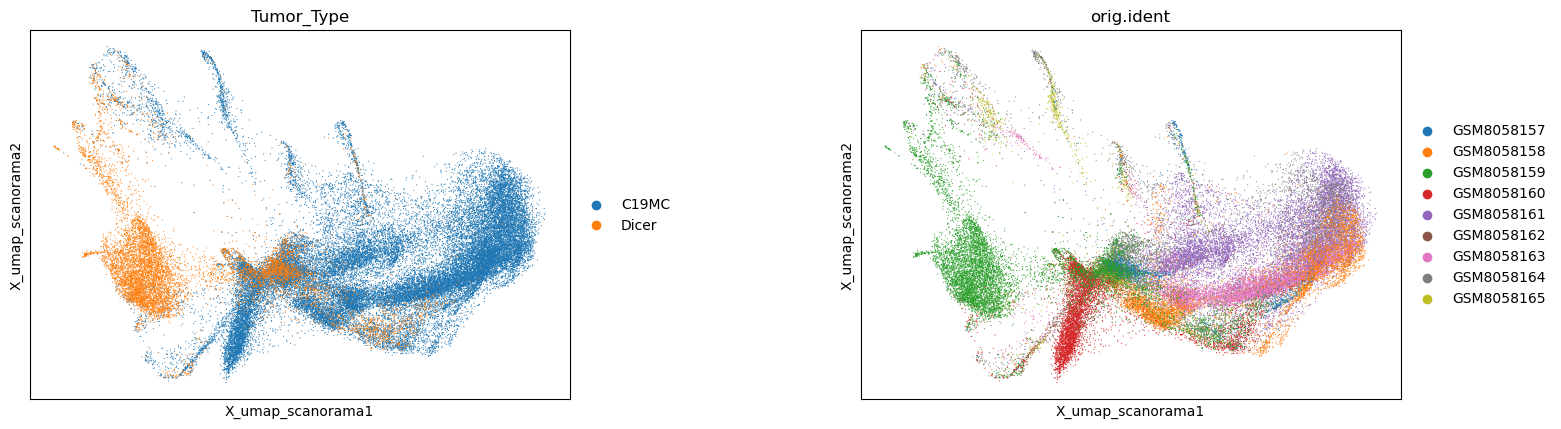

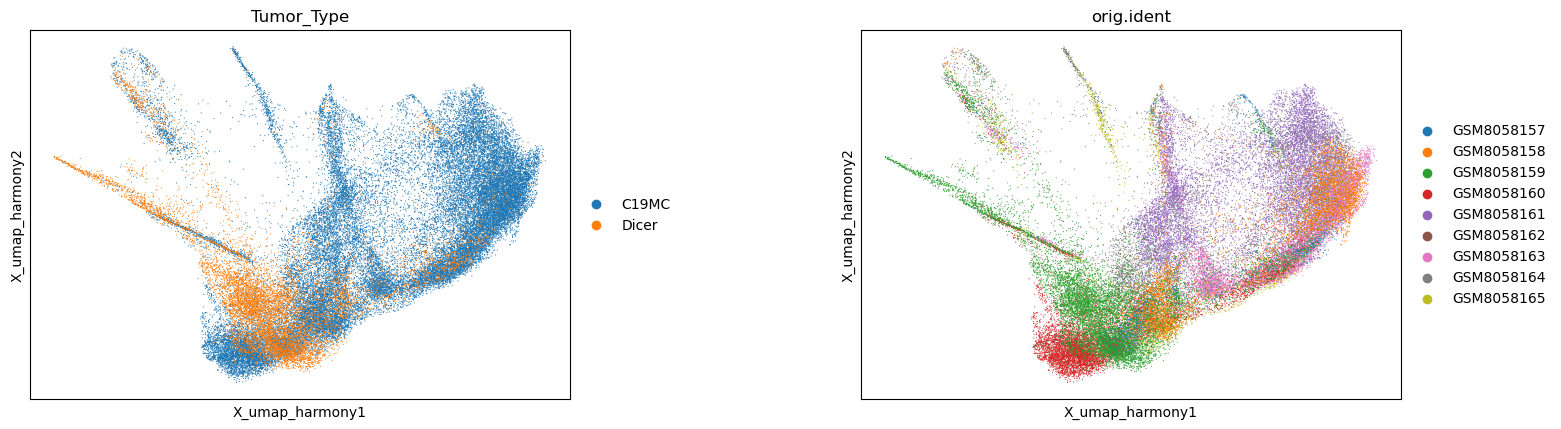

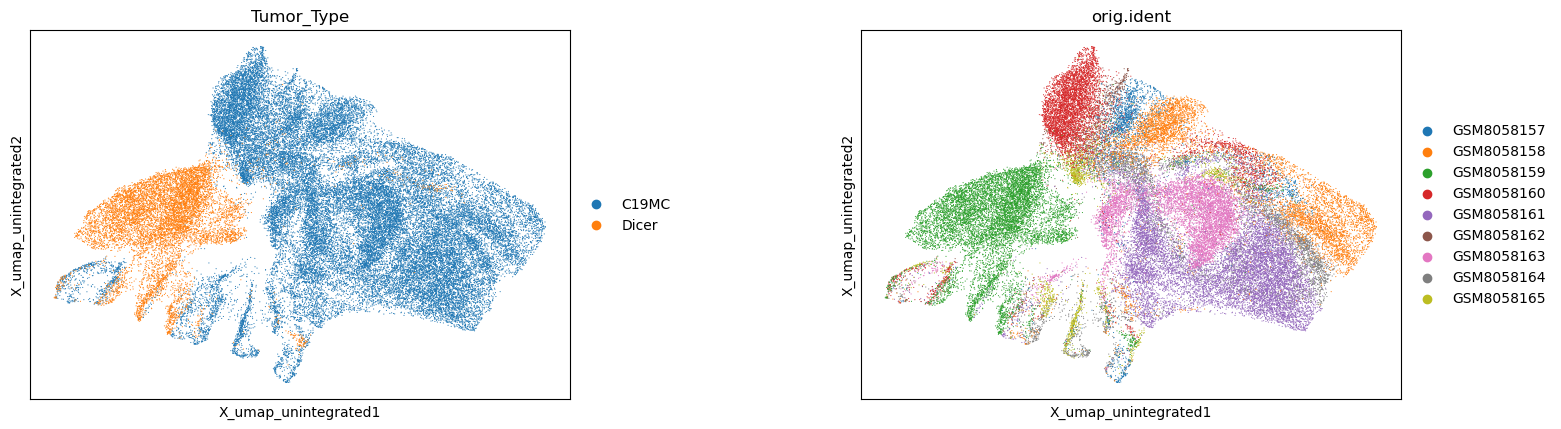

In [146]:
etmr1.obsm['X_umap_scanorama'] = etmr1.obsm['X_umap'].copy()
etmr1.obs['leiden_scanorama'] = etmr1.obs['leiden'].copy()
sc.pl.embedding(etmr1, basis="X_umap_scanorama",color=["Tumor_Type", "orig.ident"], wspace=0.4)
sc.pl.embedding(etmr1, basis="X_umap_harmony", color=["Tumor_Type", "orig.ident"], wspace=0.4)
sc.pl.embedding(etmr1, basis="X_umap_unintegrated", color=["Tumor_Type", "orig.ident"], wspace=0.4)

In [147]:
etmr1.write_h5ad("/home/sofia/Projects/etmr/defaria/snRNA/data/processed/snrna_data_umap_no_integration.h5ad")


In [150]:
etmr1.obs["leiden_unintegrated"]

GSM8058157_KK22-H-225_AAACAAGCATTCGGTTACTACTCA-1    6
GSM8058161_KK23-H-508_TCAATTGGTGAACCAAATTCGGTT-1    2
GSM8058161_KK23-H-508_TCAATTGGTGAGAAGGATTCGGTT-1    0
GSM8058161_KK23-H-508_TCAATTGGTGCGCAAGATTCGGTT-1    5
GSM8058161_KK23-H-508_TCAATTGGTTAATGCCATTCGGTT-1    0
                                                   ..
GSM8058159_KK22-H-227_CCCTAAGGTACTTCAAACTTTAGG-1    7
GSM8058159_KK22-H-227_CCCGTAGTCTATCTGGACTTTAGG-1    7
GSM8058159_KK22-H-227_CCCGTAGTCGGGCAACACTTTAGG-1    3
GSM8058159_KK22-H-227_CCCTGGATCGACCGTTACTTTAGG-1    9
GSM8058159_KK22-H-227_CTGGTTATCGCGGATAACTTTAGG-1    3
Name: leiden_unintegrated, Length: 49124, dtype: category
Categories (23, object): ['0', '1', '2', '3', ..., '19', '20', '21', '22']